In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import joblib

%matplotlib inline

In [ ]:
train_df = pd.read_csv('Titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()
print("\nMissing Values:\n", train_df.isnull().sum())

print("\nNumerical Summary:\n", train_df.describe())
print("\nCategorical Summary:\n", train_df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

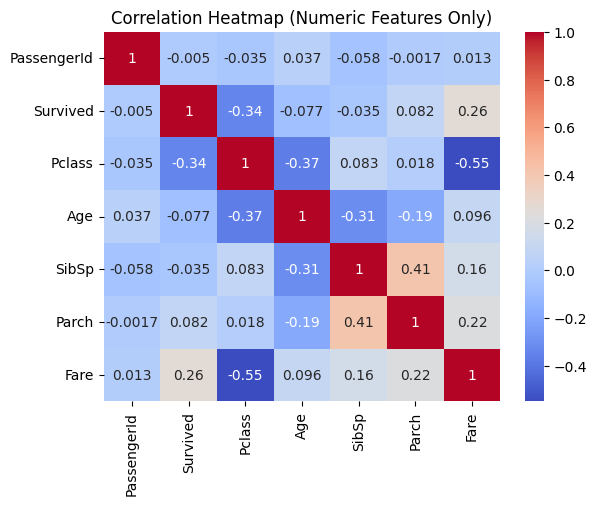

In [ ]:
numeric_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [ ]:
df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8827541827541827

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



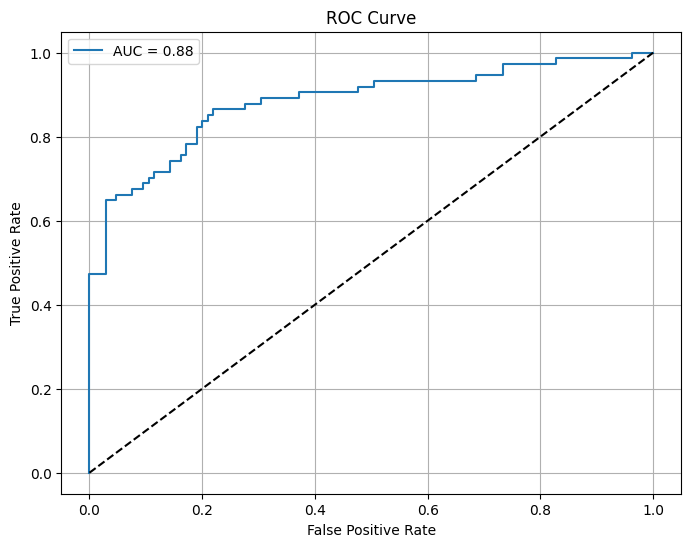

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

,Feature,Coefficient
1,Sex,-2.590612
0,Pclass,-0.938550
7,Embarked_S,-0.401270
3,SibSp,-0.294975
6,Embarked_Q,-0.112181
4,Parch,-0.108025
2,Age,-0.030592
5,Fare,0.002570


In [ ]:
# Save model
joblib.dump(model, "logistic_model.pkl")

['logistic_model.pkl']

In [ ]:
files.download("logistic_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Interview questions**

**1. Difference Between Precision and Recall?**

Precision: Of all predicted positives, how many are actually positive?

Recall: Of all actual positives, how many did we correctly predict?

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique used to assess how well a model generalizes to unseen data. In binary classification, it helps avoid overfitting and ensures stable performance across different subsets of the data.

The most common method is k-fold cross-validation, where the data is split into k parts, and the model is trained and validated k times using different splits.

It's important because it gives a more reliable estimate of model performance than a single train-test split.